# Gene-Cell Attention Visualization & Clustering Comparison

## 1. Normalized Attention visualization results with RNA sequence files

This notebook do the preprocesssing, quality control, visualizes gene-cell attention, UMAP, clustering, and compares cluster labels to true labels.

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Initialize the analyzing targets
model_type = 'seq'
edge_type = 'tx-bd'
layer_index = 4
test_mode = True

marker_genes_dict = {
    "Tumor Cells": ["EPCAM", "CDH1", "KRT8", "CEACAM5", "SOX9", "ASCL2", "LGR5", "RNF43", "CD24", "CTNNB1"],
    "Cancer Stem Cells": ["LGR5", "EPHB3", "SLC12A2"],
    "Enterocytes": ["CA2"],
    "Goblet Cells": ["MUC12", "REG4"],
    "Enteroendocrine Cells": ["INSM1"],
    "T Cells": ["CD3D", "CD3E", "CD3G", "TRAC", "TRBC2", "CD2"],
    "Regulatory T Cells": ["FOXP3", "CTLA4", "TIGIT", "TOX"],
    "NK Cells": ["GZMA", "KLRB1"],
    "B Cells": ["MS4A1", "CD79A", "BANK1"],
    "Plasma Cells": ["TNFRSF25", "LRMP"],
    "Macrophages": ["CD14", "CD163", "APOE", "MS4A7"],
    "Dendritic Cells": ["ID2"],
    "Mast Cells": ["CPA3", "HDC"],
    "Neutrophils": ["CYBB"],
    "Fibroblasts": ["COL1A1", "COL5A2", "ACTA2", "TAGLN", "THBS1", "THBS2"],
    "Smooth Muscle Cells": ["ACTA2", "TAGLN"],
    "Endothelial Cells": ["PECAM1", "VWF", "PLVAP", "AQP1", "PTPRB"],
    "Lymphatic Endothelial Cells": ["PROX1"],
    "Pericytes": ["RGS5", "ACTA2"],
    "Proliferating Cells": ["MKI67", "TOP2A", "PTTG1", "UBE2C", "NUSAP1", "PCLAF", "TK1", "RRM2", "TYMS", "STMN1"]
}

In [3]:
# Load the attention results
with open(Path('/dkfz/cluster/gpu/data/OE0606/fengyun/attention_results/colon') / f'attention_gene_matrix_dict_{model_type}_{edge_type}_{test_mode}.pkl', 'rb') as f:
    attention_results = pickle.load(f)

Loaded attention data:
  - Attention matrices shape: 5 layers, 4 heads, 541 genes, 416758 cells
Filtering cells with mean attention between 1e-06 and 1...
Cell filtering completed:
  - Original cells: 416758
  - Filtered cells: 10746
  - Removed cells: 406012
  - Threshold: (1e-06, 1)
Normalizing attention weights using layer_norm method...
Attention weights normalized using layer_norm method.
Performing UMAP embedding with n_neighbors=15, min_dist=0.1, metric=cosine...


/home/f833u/fySegger/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


UMAP embedding completed:
  - Embedding shape: (10746, 2)
Performing leiden clustering...


/home/f833u/segger/attention_downstream/scripts/gene_cell_attention_analysis.py:321: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(self.adata, resolution=self.resolution, random_state=self.random_state)


Clustering completed with 9 clusters
Number of cells in each cluster: [3544 2416 1517 1344  831  606  398   46   44]
Finding top 5 genes per cluster...
Top genes identified for 9 clusters
Creating top genes heatmap...


dendrogram data not found (using key=dendrogram_cluster). Running `sc.tl.dendrogram` with default parameters. For fine tuning it is recommended to run `sc.tl.dendrogram` independently.
Groups are not reordered because the `groupby` categories and the `var_group_labels` are different.
categories: Cluster 0, Cluster 1, Cluster 2, etc.
var_group_labels: Tumor Cells, Cancer Stem Cells, Enterocytes, etc.


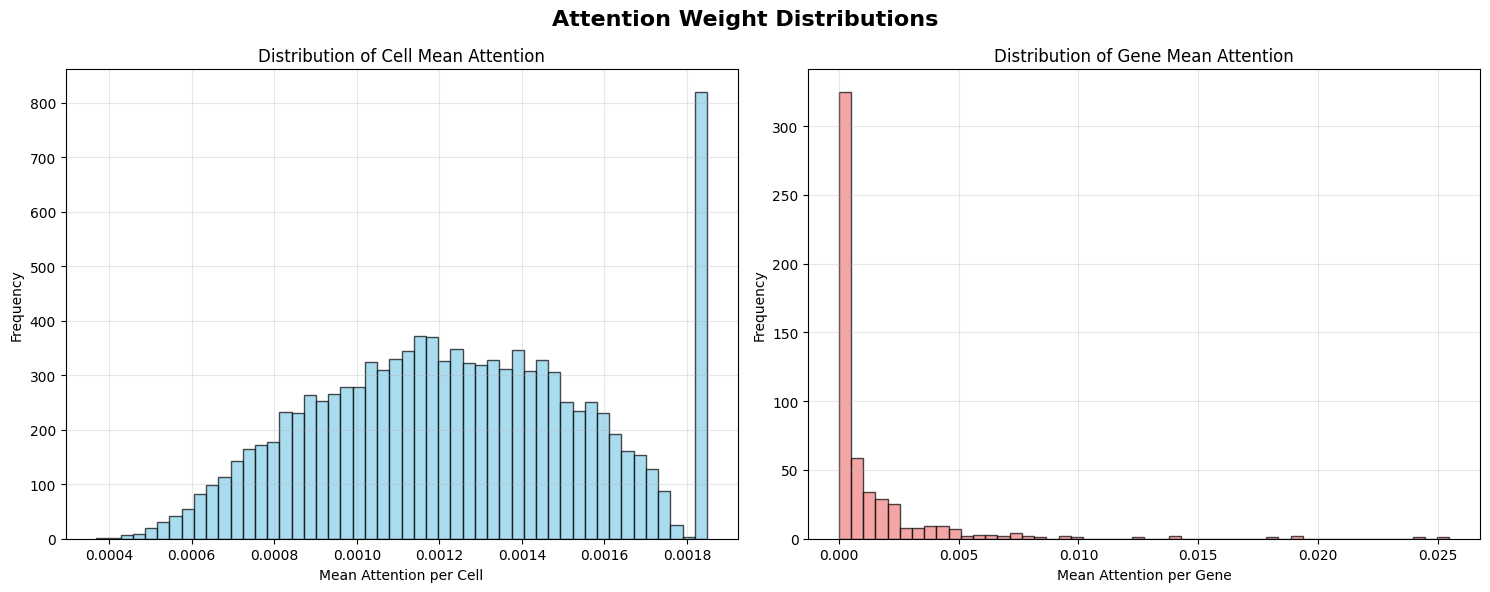

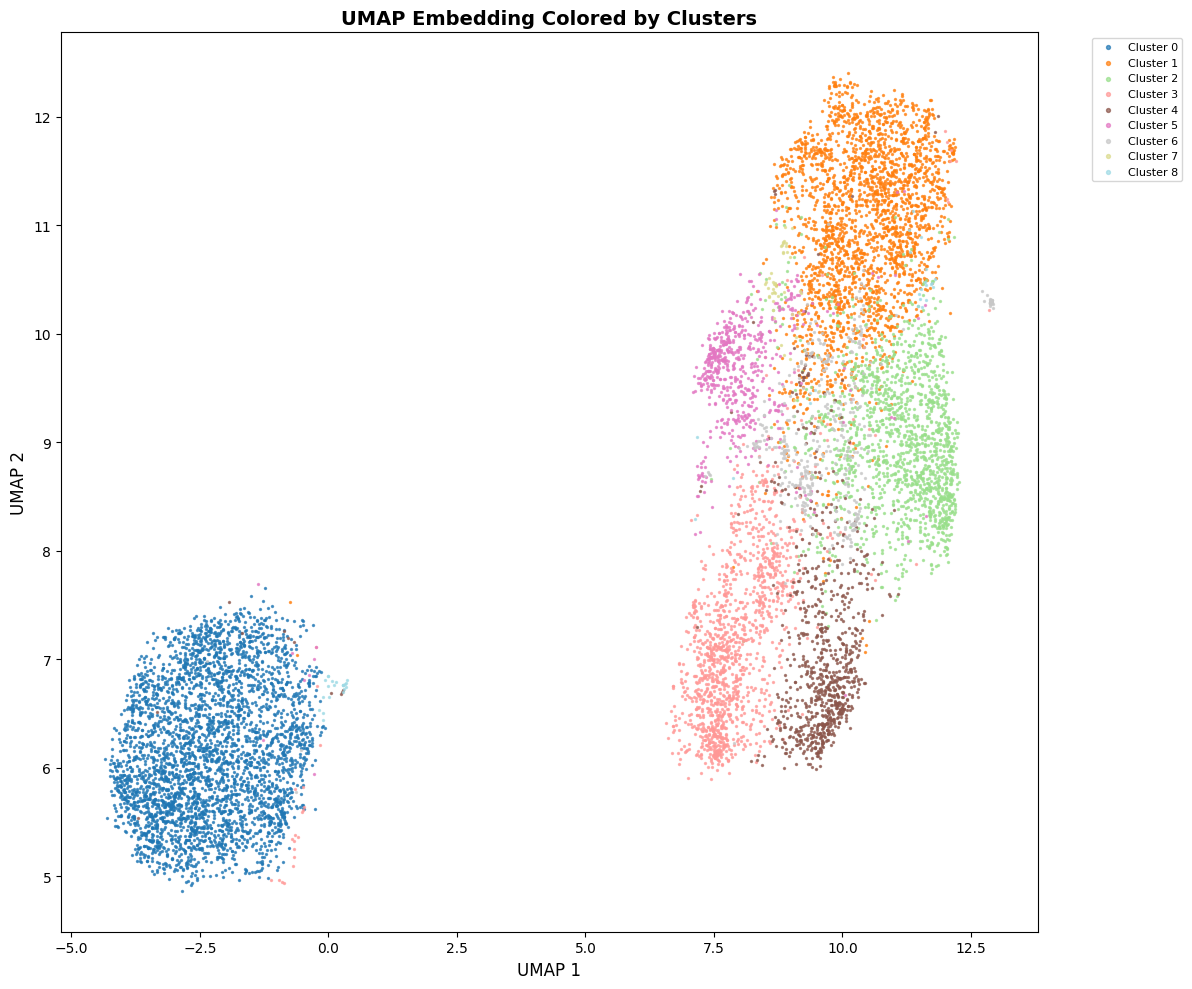

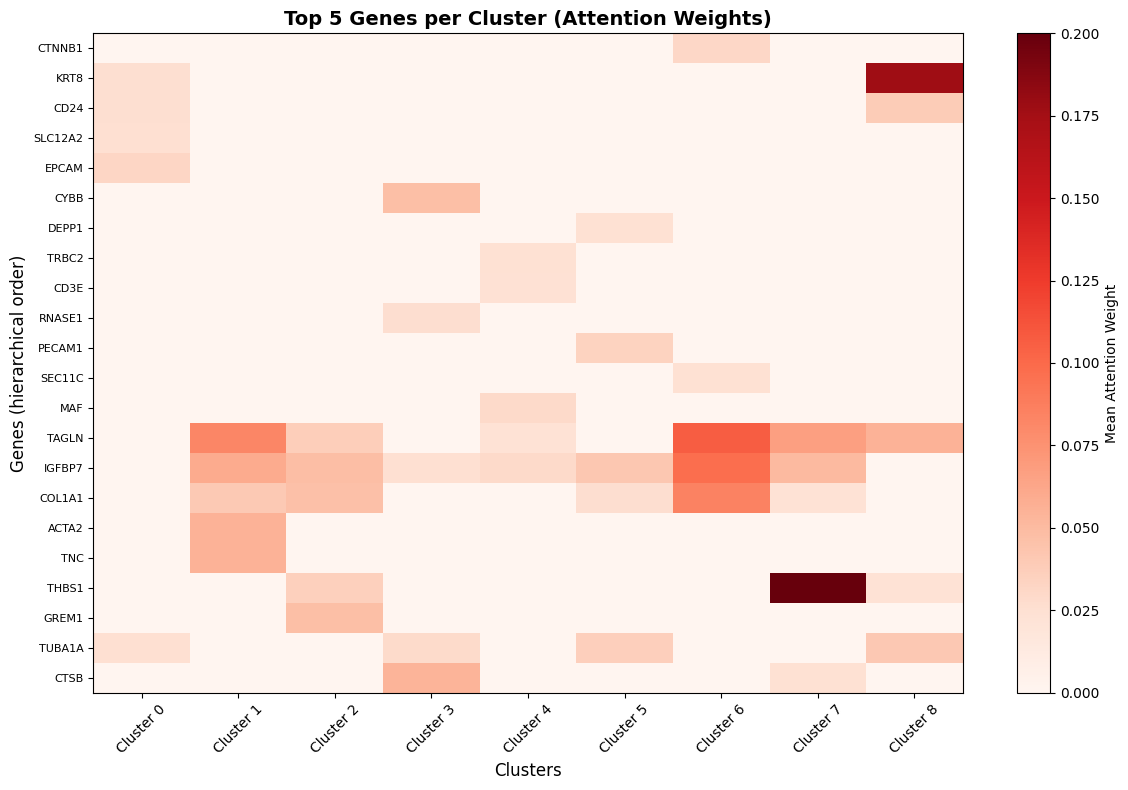

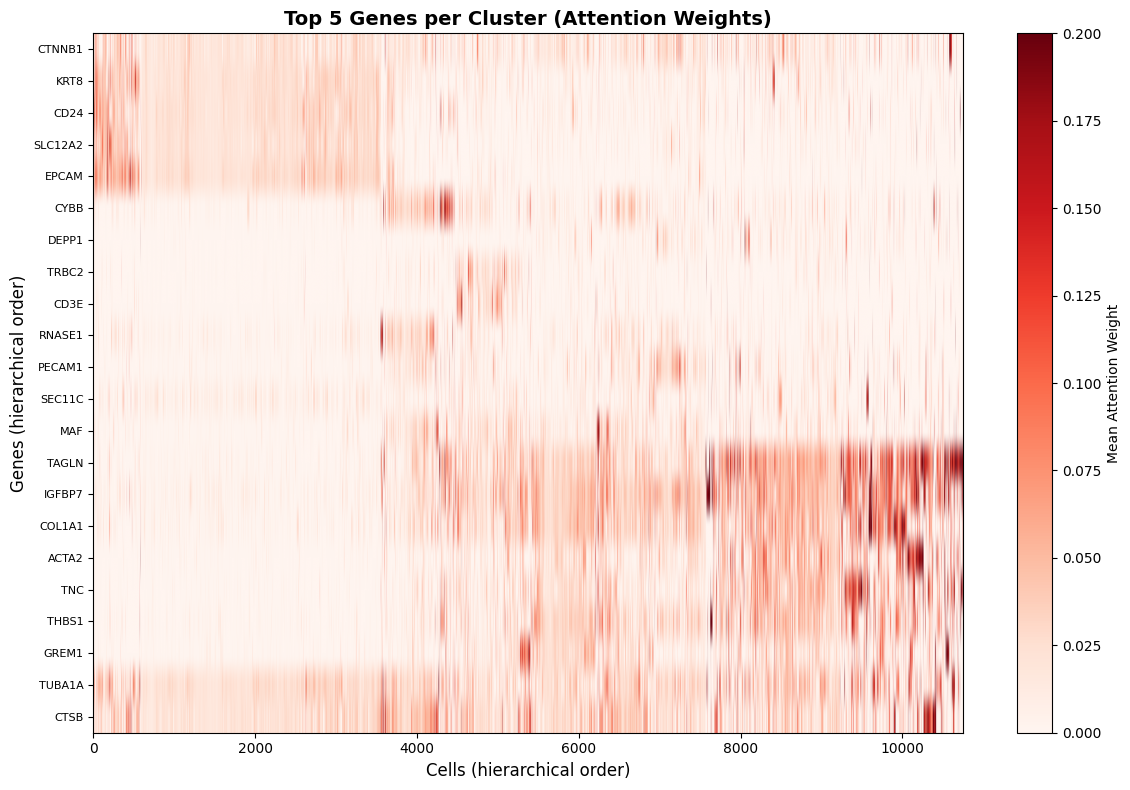

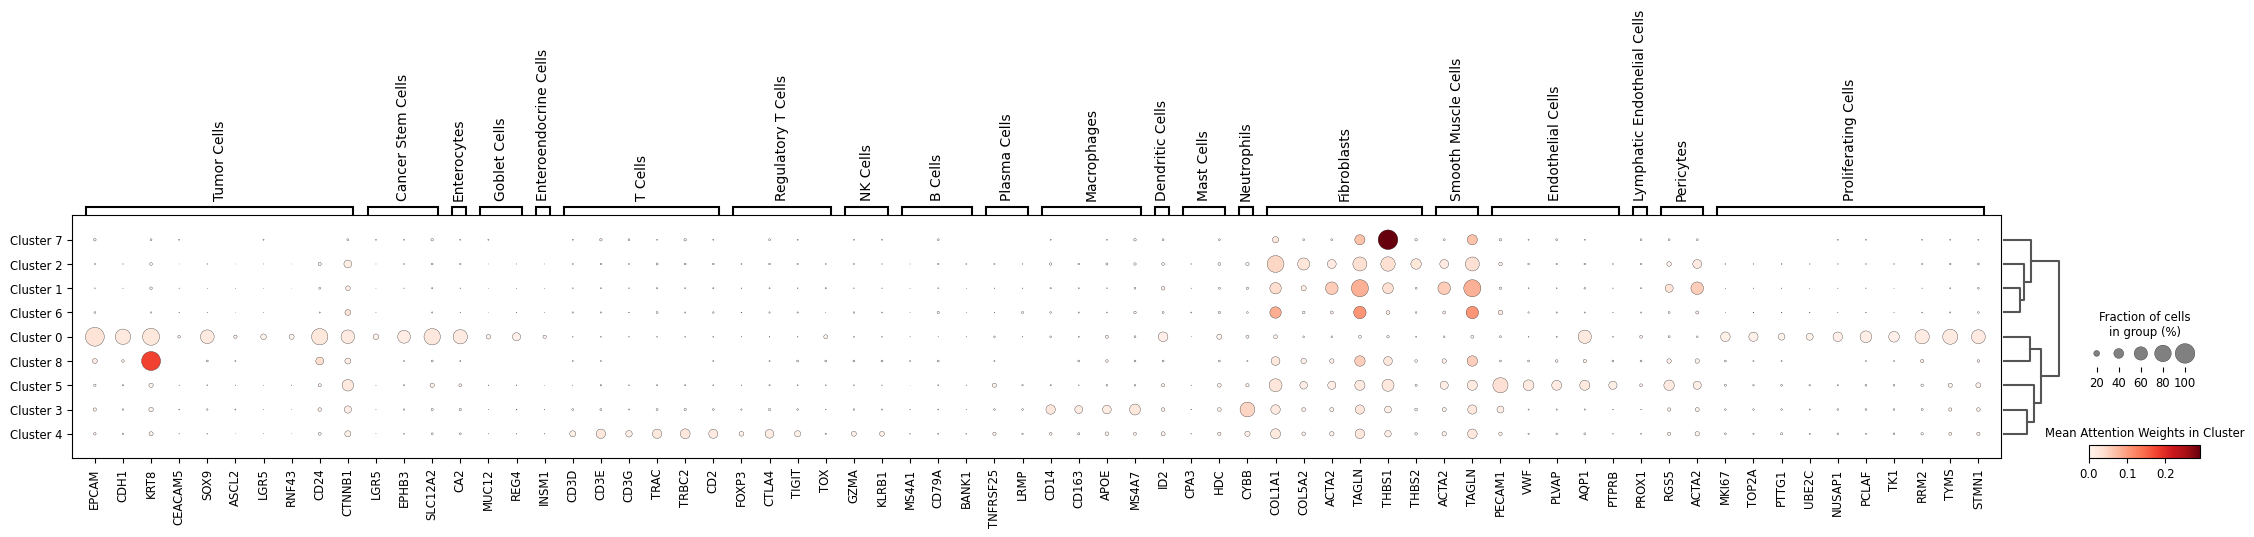

In [4]:
attention_matrices = attention_results['adj_avg_matrix']
cell_ids = attention_results['cell_ids']
gene_names = attention_results['gene_names']

# Initialize the analyzer
from scripts.gene_cell_attention_analysis import GeneCellAttentionAnalyzer

analyzer = GeneCellAttentionAnalyzer(num_genes=attention_matrices[0][0].shape[0], num_cells=attention_matrices[0][0].shape[1], num_heads=4, num_layers=5)

# run the analysis
kwargs = {'attention_matrices': attention_matrices, 'cell_ids': cell_ids, 'gene_names': gene_names, 'layer_idx': layer_index, 'max_cells': None, 'min_attention_threshold': 1e-6, 'max_attention_threshold': 1, 'method': 'layer_norm', 'threshold': 0.001, 'clustering_method': 'leiden', 'resolution': 0.8, 'random_state': 42, 'top_k': 5, 'marker_genes_dict': marker_genes_dict, 'save_path_attention_distribution': None, 'save_path_umap': None, 'save_path_top_genes_cluster_heatmap': None, 'save_path_top_genes_cell_heatmap': None}

analyzer.run_complete_analysis(**kwargs)

In [9]:
# # save the analysis results
# Output_path = Path('/dkfz/cluster/gpu/data/OE0606/fengyun/attention_results/colon/intermediate_data') / f'analysis_results_{model_type}_{edge_type}_layer_{layer_index}.pkl'

# analyzer.save_analysis_results(save_path=Output_path)

### 1.2 Unnormalized Attention analysis results on Layer 5 attention with RNA sequence

Loaded attention data:
  - Attention matrices shape: 5 layers, 4 heads, 541 genes, 416758 cells
Filtering cells with mean attention between 1e-06 and 1...
Cell filtering completed:
  - Original cells: 416758
  - Filtered cells: 10746
  - Removed cells: 406012
  - Threshold: (1e-06, 1)
Normalizing attention weights using layer_norm method...
Attention weights normalized using layer_norm method.
Performing UMAP embedding with n_neighbors=15, min_dist=0.1, metric=cosine...
UMAP embedding completed:
  - Embedding shape: (10746, 2)
Performing leiden clustering...
Clustering completed with 8 clusters
Number of cells in each cluster: [2520 1911 1730 1244 1073 1009  856  403]
Finding top 5 genes per cluster...
Top genes identified for 8 clusters
Creating top genes heatmap...


dendrogram data not found (using key=dendrogram_cluster). Running `sc.tl.dendrogram` with default parameters. For fine tuning it is recommended to run `sc.tl.dendrogram` independently.
Groups are not reordered because the `groupby` categories and the `var_group_labels` are different.
categories: Cluster 0, Cluster 1, Cluster 2, etc.
var_group_labels: Tumor Cells, Cancer Stem Cells, Enterocytes, etc.


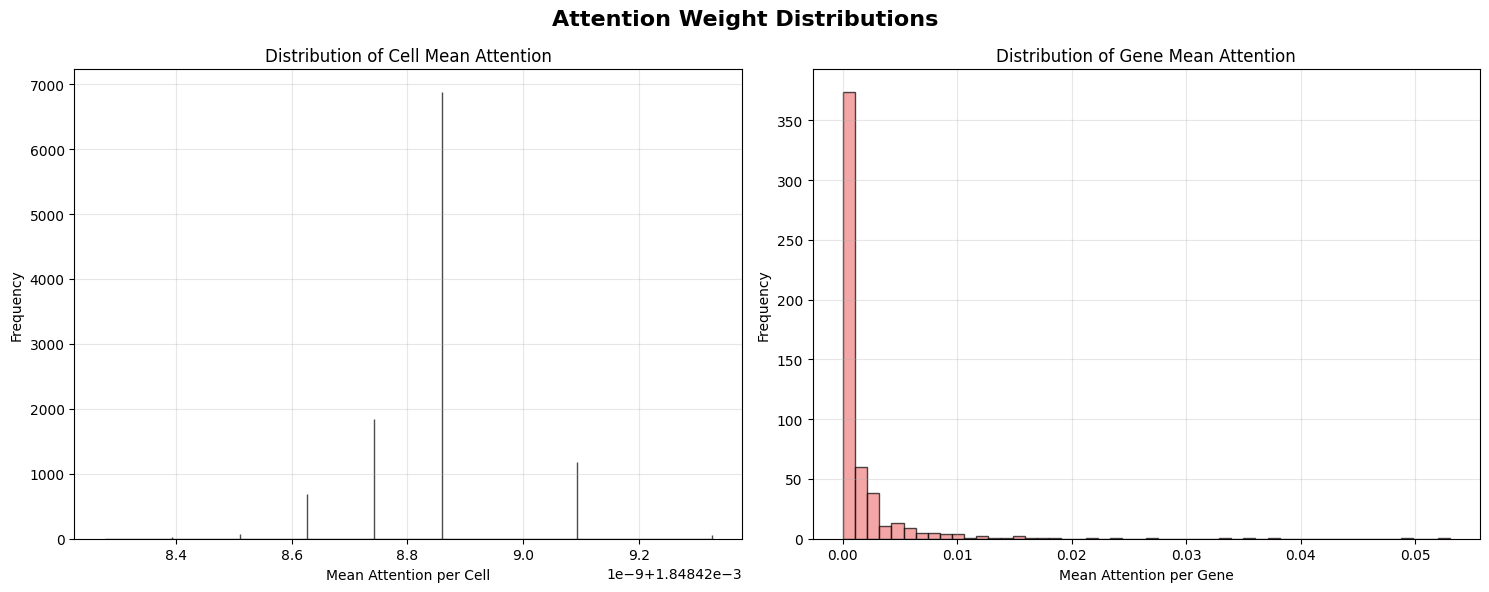

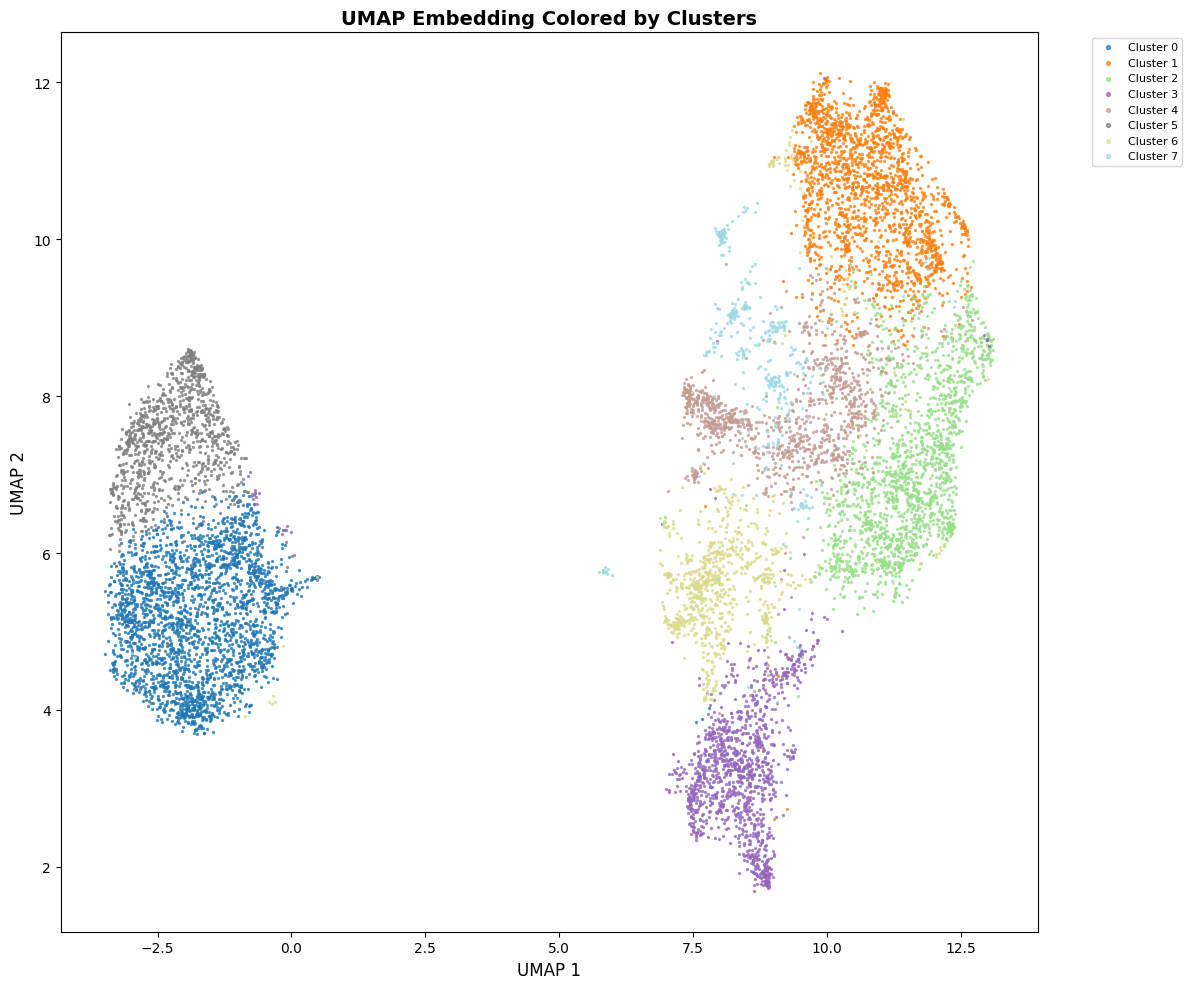

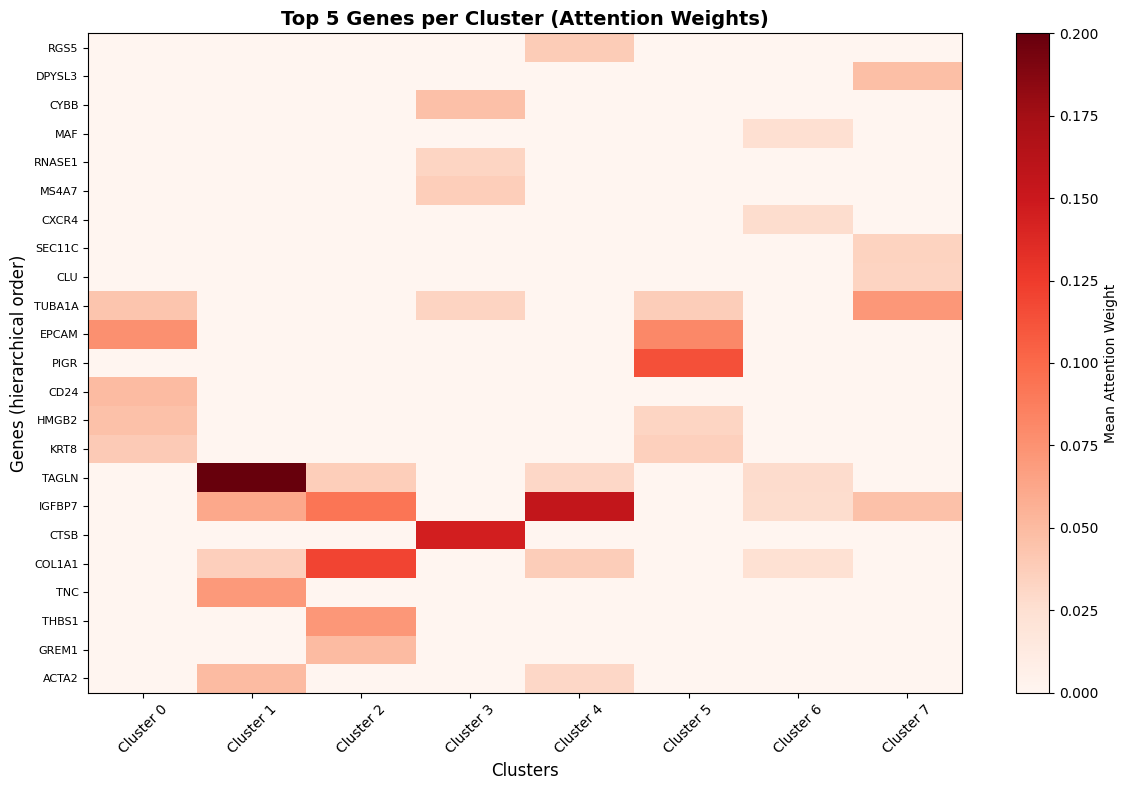

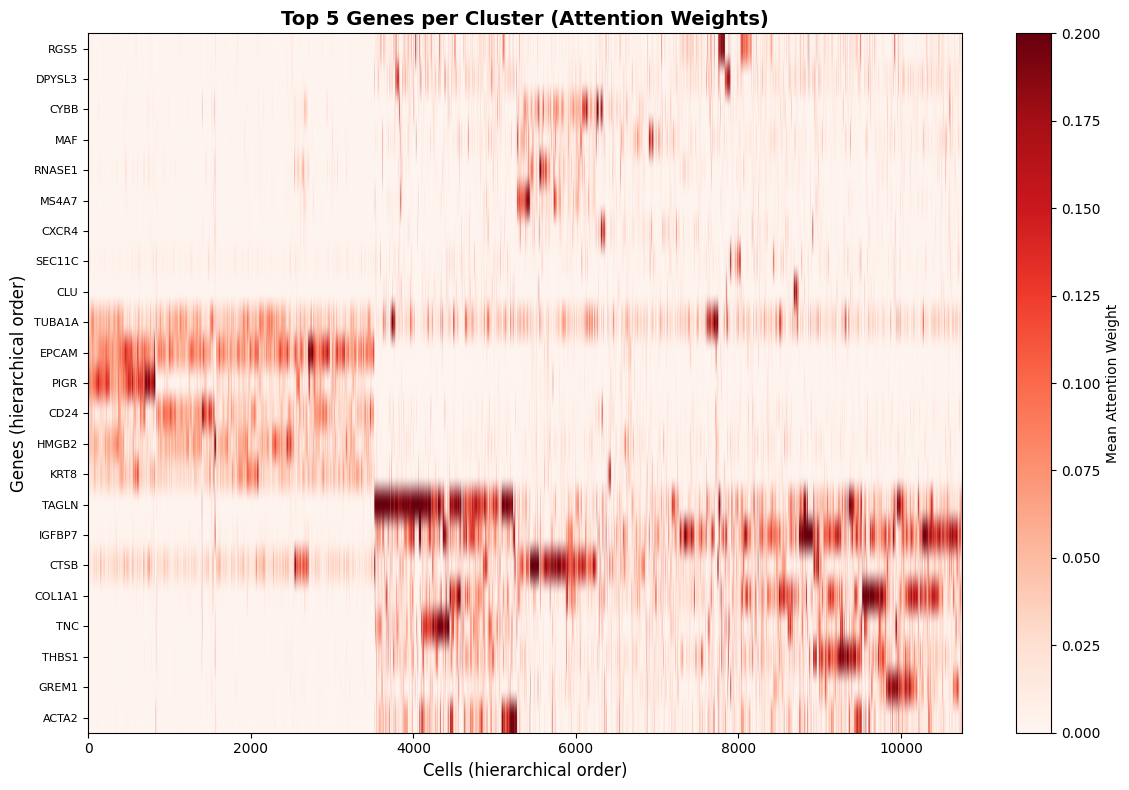

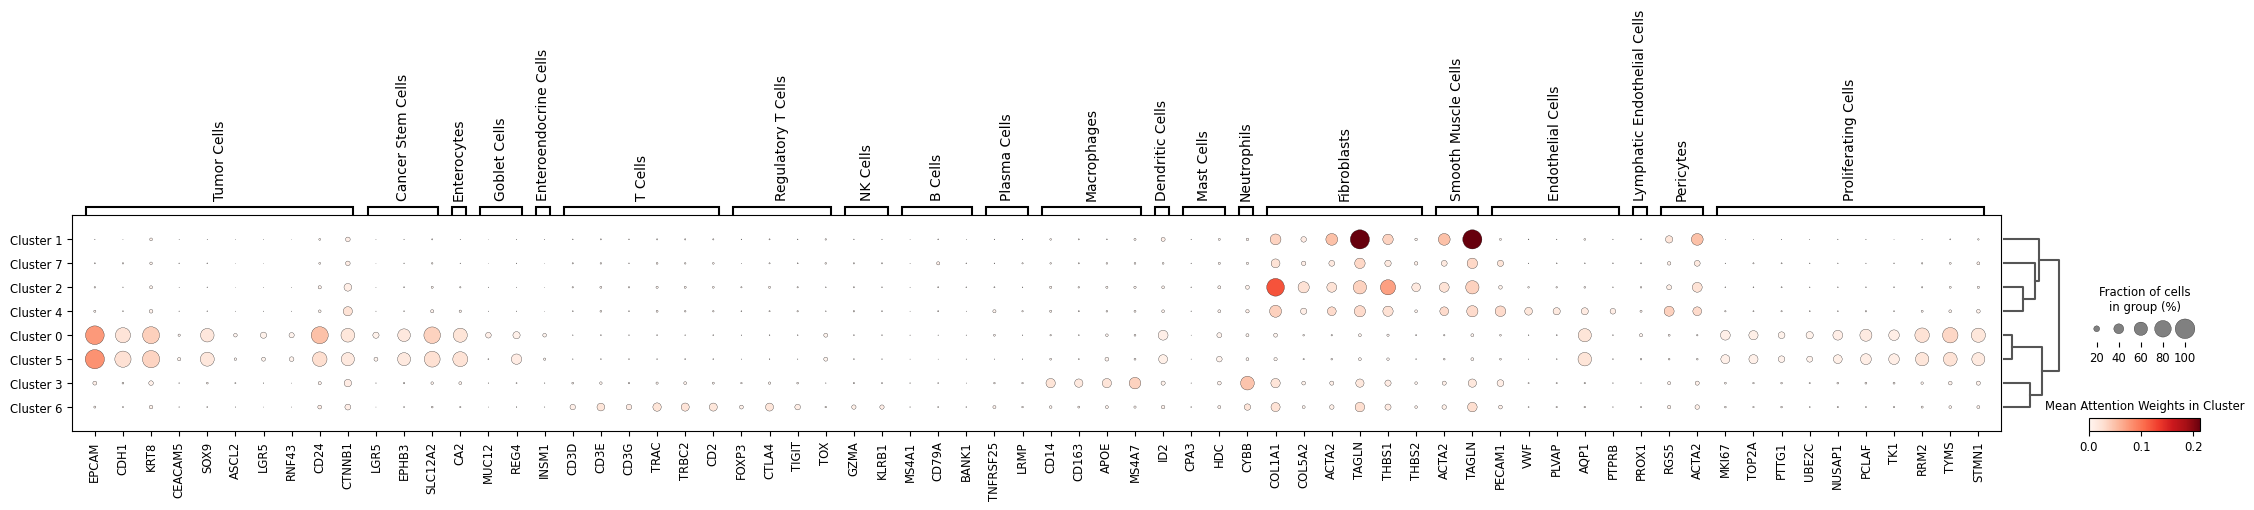

In [5]:
layer_index = 4

attention_matrices = attention_results['adj_matrix']

kwargs = {'attention_matrices': attention_matrices, 'cell_ids': cell_ids, 'gene_names': gene_names, 'layer_idx': layer_index, 'max_cells': None, 'min_attention_threshold': 1e-6, 'max_attention_threshold': 1, 'method': 'layer_norm', 'threshold': 0.001, 'clustering_method': 'leiden', 'resolution': 0.8, 'random_state': 42, 'top_k': 5, 'marker_genes_dict': marker_genes_dict, 'save_path_attention_distribution': None, 'save_path_umap': None, 'save_path_top_genes_cluster_heatmap': None, 'save_path_top_genes_cell_heatmap': None}

analyzer.run_complete_analysis(**kwargs)

## 2. Attention analysis results without RNA sequence file

Below, we loaded the attention matrices from the Segger's model without RNA sequence files.

### 2.1 Normalized Attention analysis results attention without RNA sequence

Loaded attention data:
  - Attention matrices shape: 5 layers, 4 heads, 541 genes, 412718 cells
Filtering cells with mean attention between 1e-06 and 1...
Cell filtering completed:
  - Original cells: 412718
  - Filtered cells: 10929
  - Removed cells: 401789
  - Threshold: (1e-06, 1)
Normalizing attention weights using layer_norm method...
Attention weights normalized using layer_norm method.
Performing UMAP embedding with n_neighbors=15, min_dist=0.1, metric=cosine...
UMAP embedding completed:
  - Embedding shape: (10929, 2)
Performing leiden clustering...
Clustering completed with 7 clusters
Number of cells in each cluster: [3412 1974 1590 1567 1557  550  279]
Finding top 5 genes per cluster...
Top genes identified for 7 clusters
Creating top genes heatmap...


dendrogram data not found (using key=dendrogram_cluster). Running `sc.tl.dendrogram` with default parameters. For fine tuning it is recommended to run `sc.tl.dendrogram` independently.
Groups are not reordered because the `groupby` categories and the `var_group_labels` are different.
categories: Cluster 0, Cluster 1, Cluster 2, etc.
var_group_labels: Tumor Cells, Cancer Stem Cells, Enterocytes, etc.


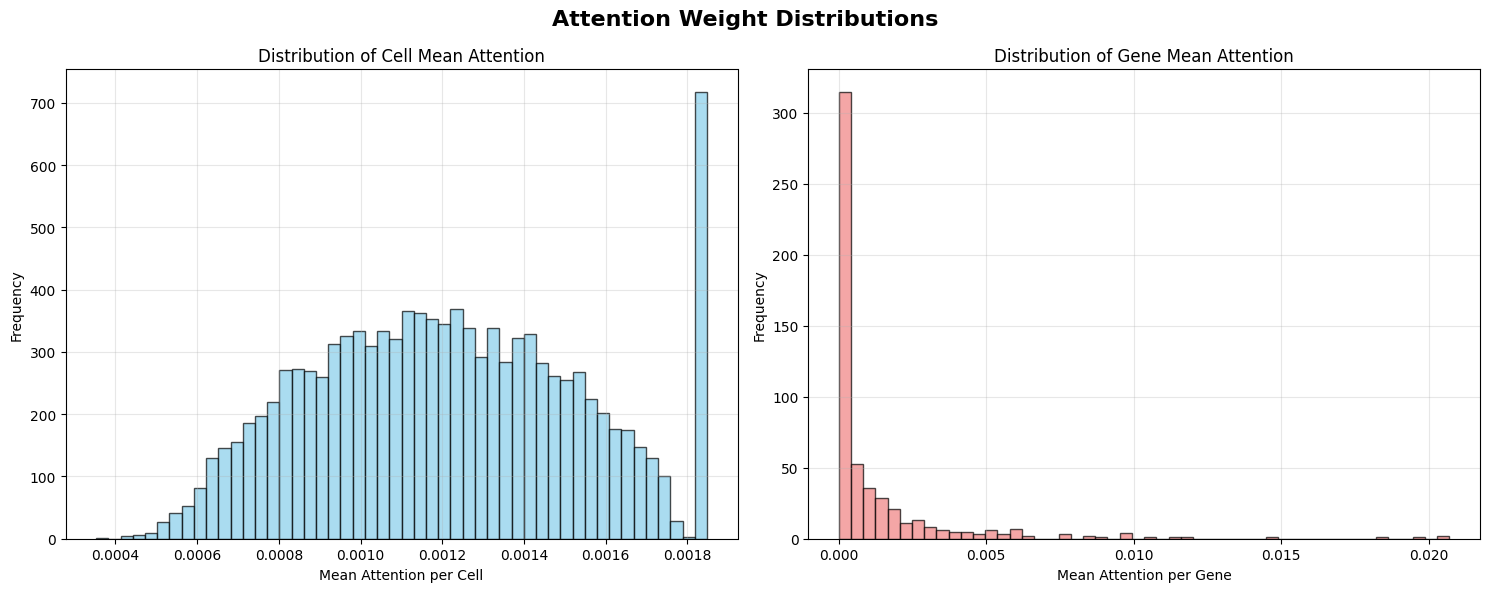

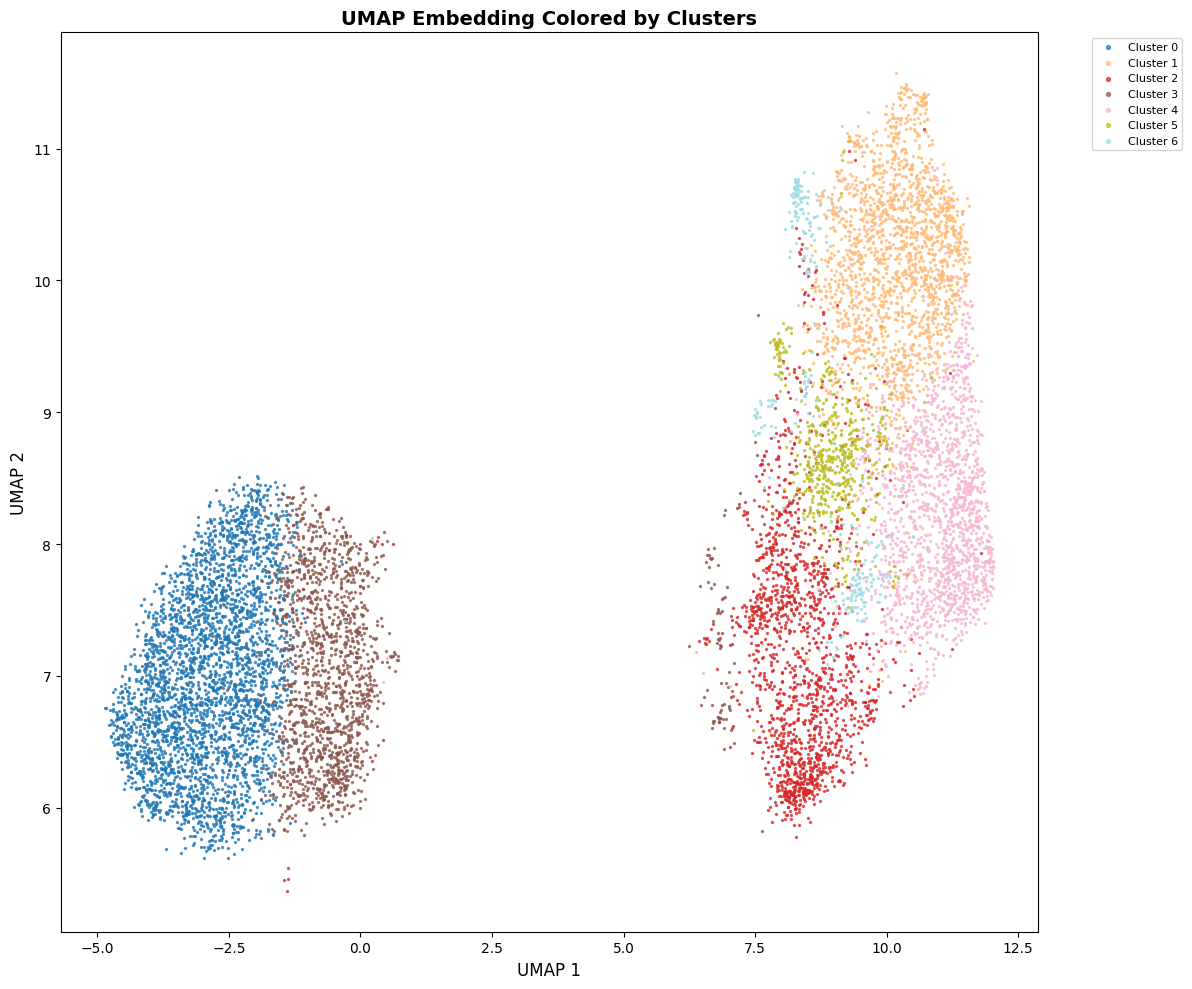

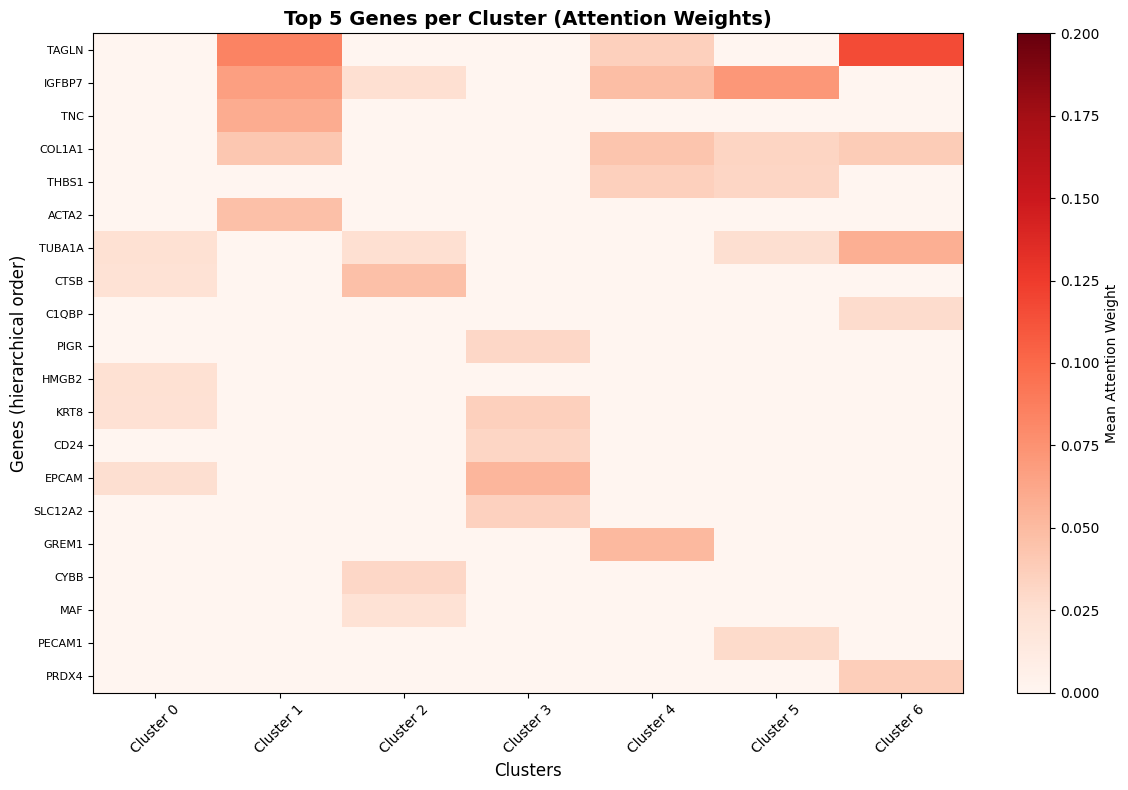

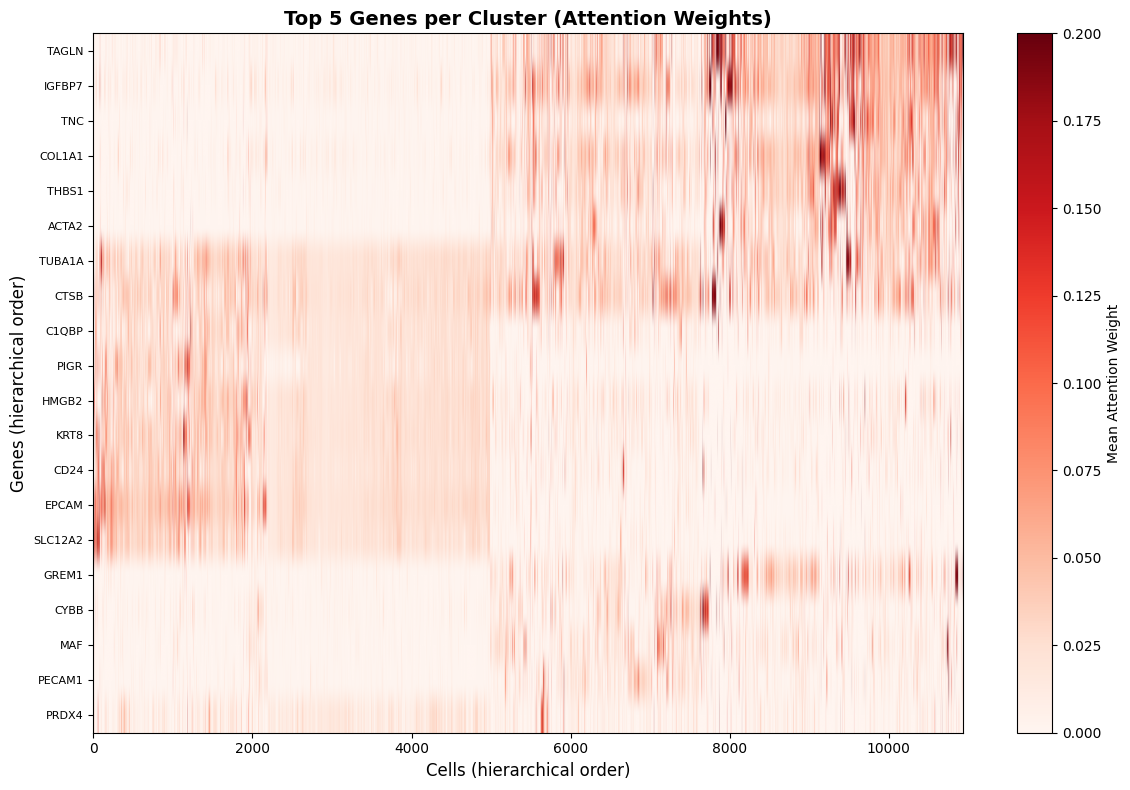

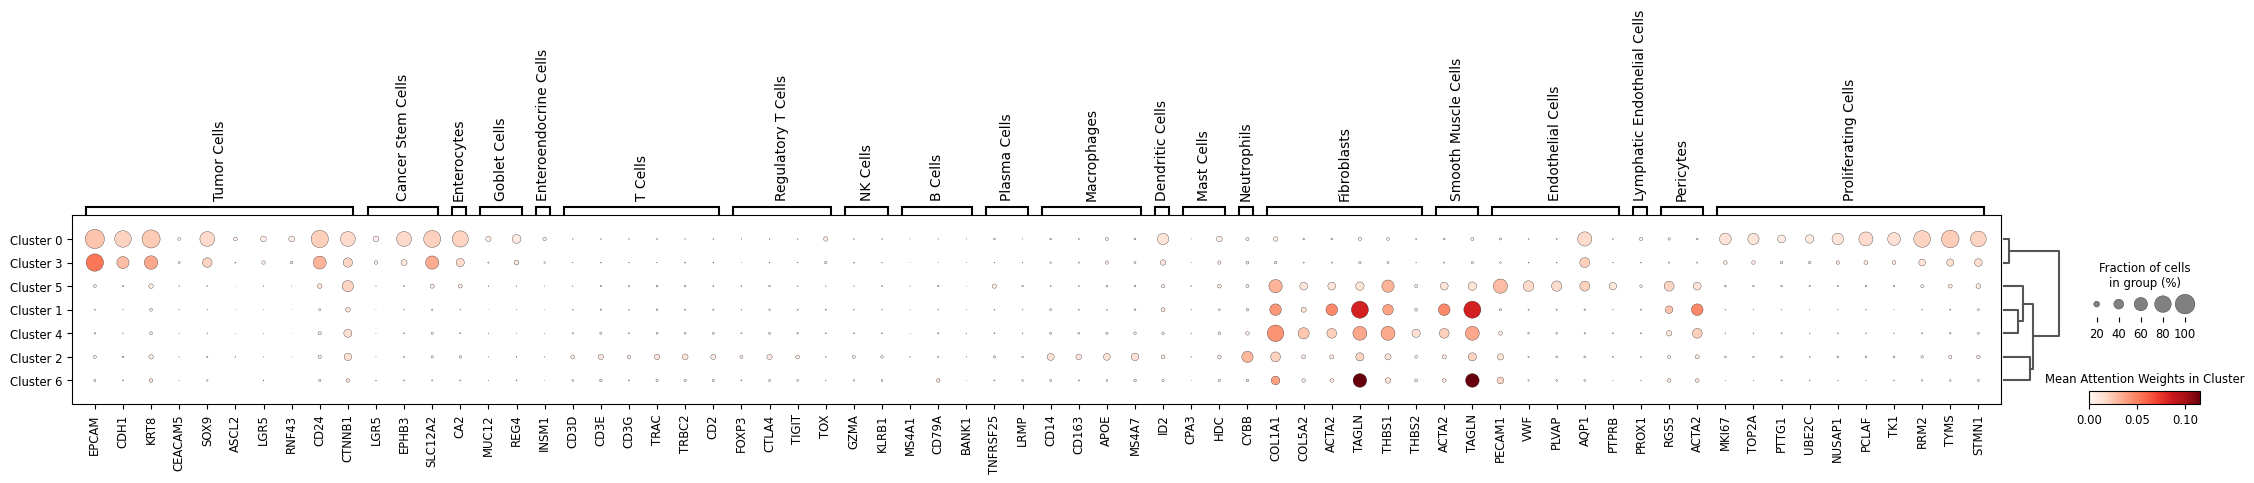

In [10]:
model_type = 'no_seq'
layer_index = 4
edge_type = 'tx-bd'
test_mode = True

# Load the attention results
with open(Path('/dkfz/cluster/gpu/data/OE0606/fengyun/attention_results/colon') / f'attention_gene_matrix_dict_{model_type}_{edge_type}_{test_mode}.pkl', 'rb') as f:
    attention_results = pickle.load(f)
    
attention_matrices = attention_results['adj_avg_matrix']
cell_ids = attention_results['cell_ids']
gene_names = attention_results['gene_names']

from scripts.gene_cell_attention_analysis import GeneCellAttentionAnalyzer

analyzer = GeneCellAttentionAnalyzer(num_genes=attention_matrices[0][0].shape[0], num_cells=attention_matrices[0][0].shape[1], num_heads=4, num_layers=5)

kwargs = {'attention_matrices': attention_matrices, 'cell_ids': cell_ids, 'gene_names': gene_names, 'layer_idx': 4, 'max_cells': None, 'min_attention_threshold': 1e-6, 'max_attention_threshold': 1, 'method': 'layer_norm', 'threshold': 0.001, 'clustering_method': 'leiden', 'resolution': 0.8, 'random_state': 42, 'top_k': 5, 'marker_genes_dict': marker_genes_dict, 'save_path_attention_distribution': None, 'save_path_umap': None, 'save_path_top_genes_cluster_heatmap': None, 'save_path_top_genes_cell_heatmap': None}

analyzer.run_complete_analysis(**kwargs)

### 2.2 Unnormalized Attention analysis results on Layer 5 attention without RNA sequence

Loaded attention data:
  - Attention matrices shape: 5 layers, 4 heads, 541 genes, 412718 cells
Filtering cells with mean attention between 1e-06 and 1...
Cell filtering completed:
  - Original cells: 412718
  - Filtered cells: 10929
  - Removed cells: 401789
  - Threshold: (1e-06, 1)
Normalizing attention weights using layer_norm method...
Attention weights normalized using layer_norm method.
Performing UMAP embedding with n_neighbors=15, min_dist=0.1, metric=cosine...
UMAP embedding completed:
  - Embedding shape: (10929, 2)
Performing leiden clustering...
Clustering completed with 10 clusters
Number of cells in each cluster: [2276 1599 1562 1406 1152 1118  978  538  208   92]
Finding top 5 genes per cluster...
Top genes identified for 10 clusters
Creating top genes heatmap...


dendrogram data not found (using key=dendrogram_cluster). Running `sc.tl.dendrogram` with default parameters. For fine tuning it is recommended to run `sc.tl.dendrogram` independently.
Groups are not reordered because the `groupby` categories and the `var_group_labels` are different.
categories: Cluster 0, Cluster 1, Cluster 2, etc.
var_group_labels: Tumor Cells, Cancer Stem Cells, Enterocytes, etc.


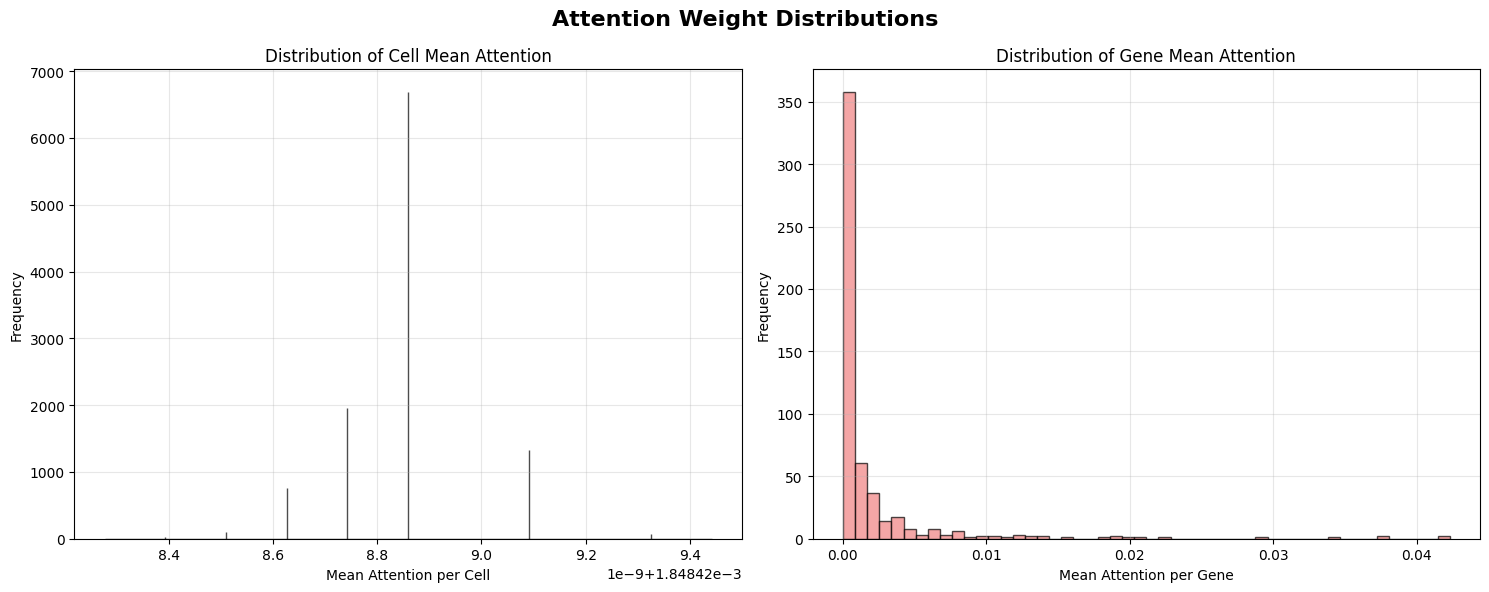

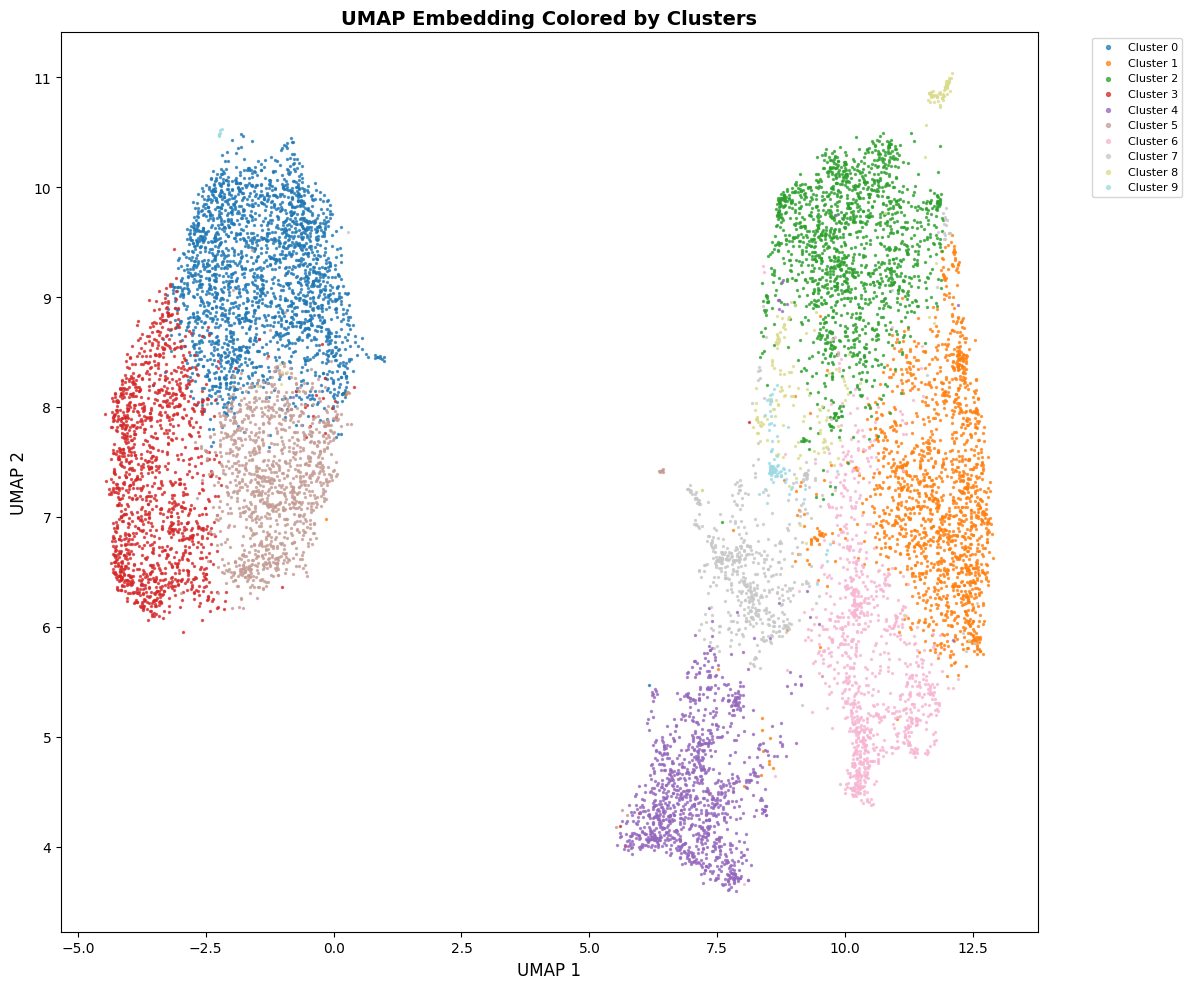

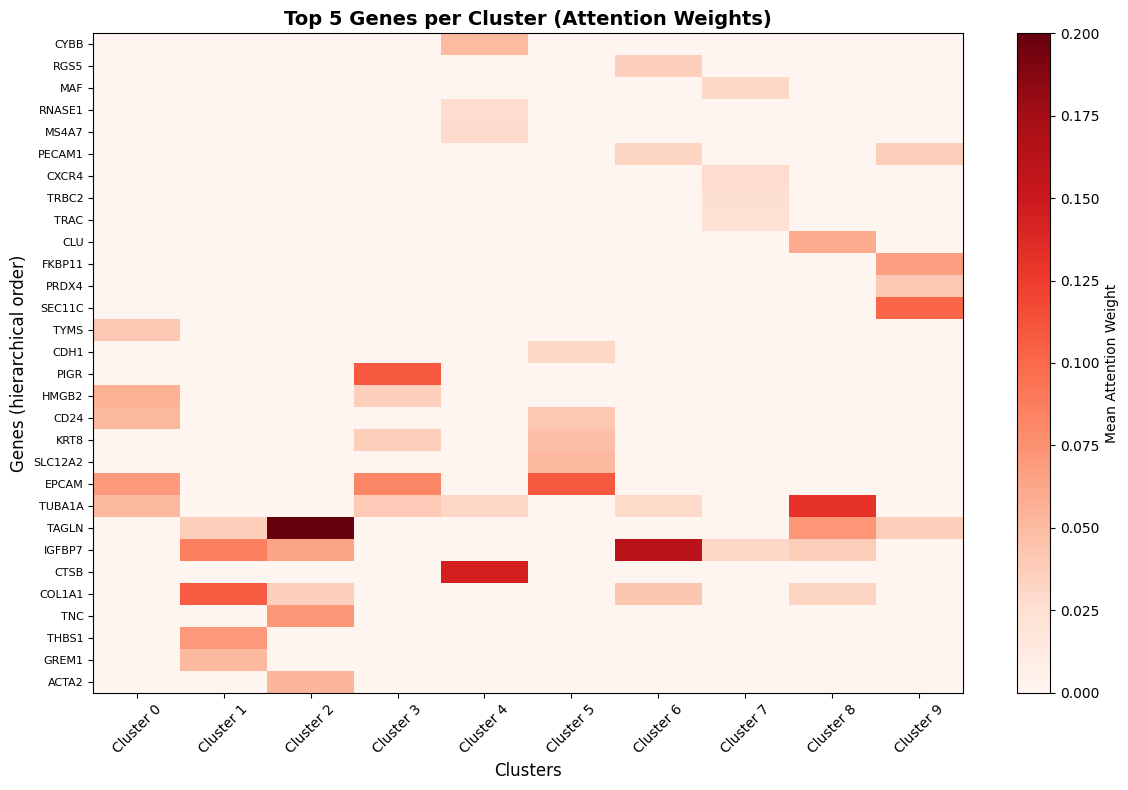

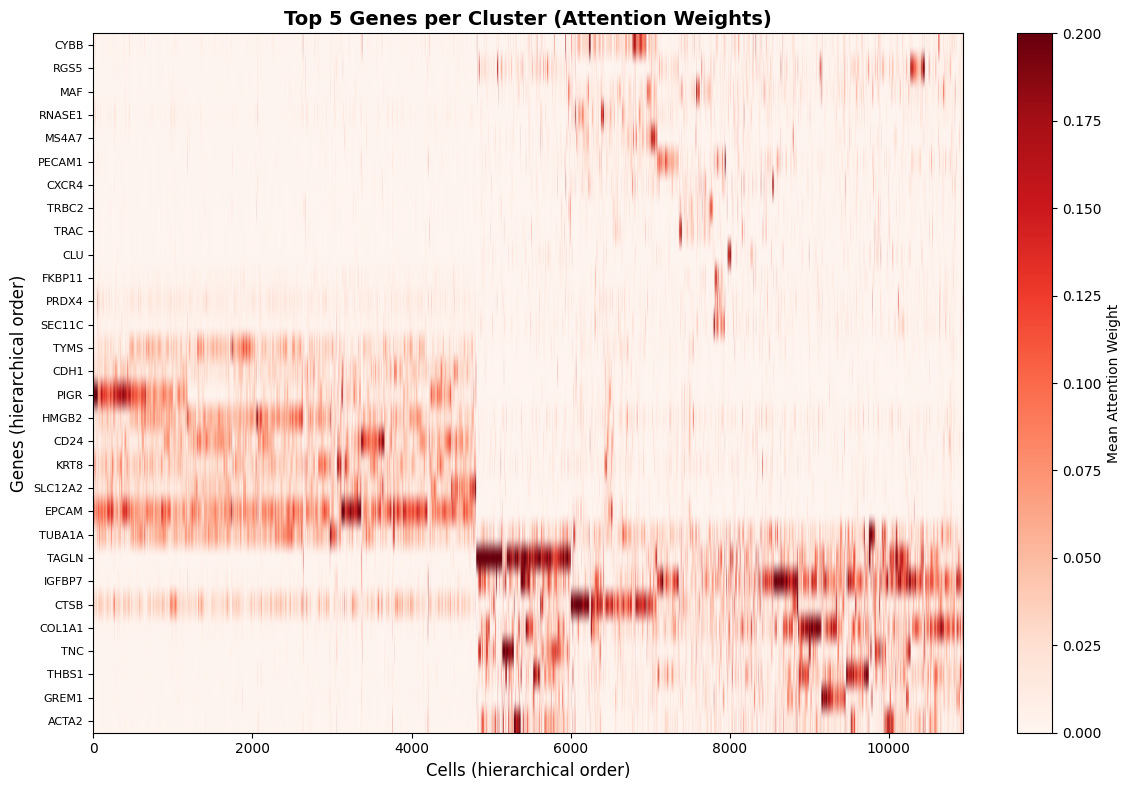

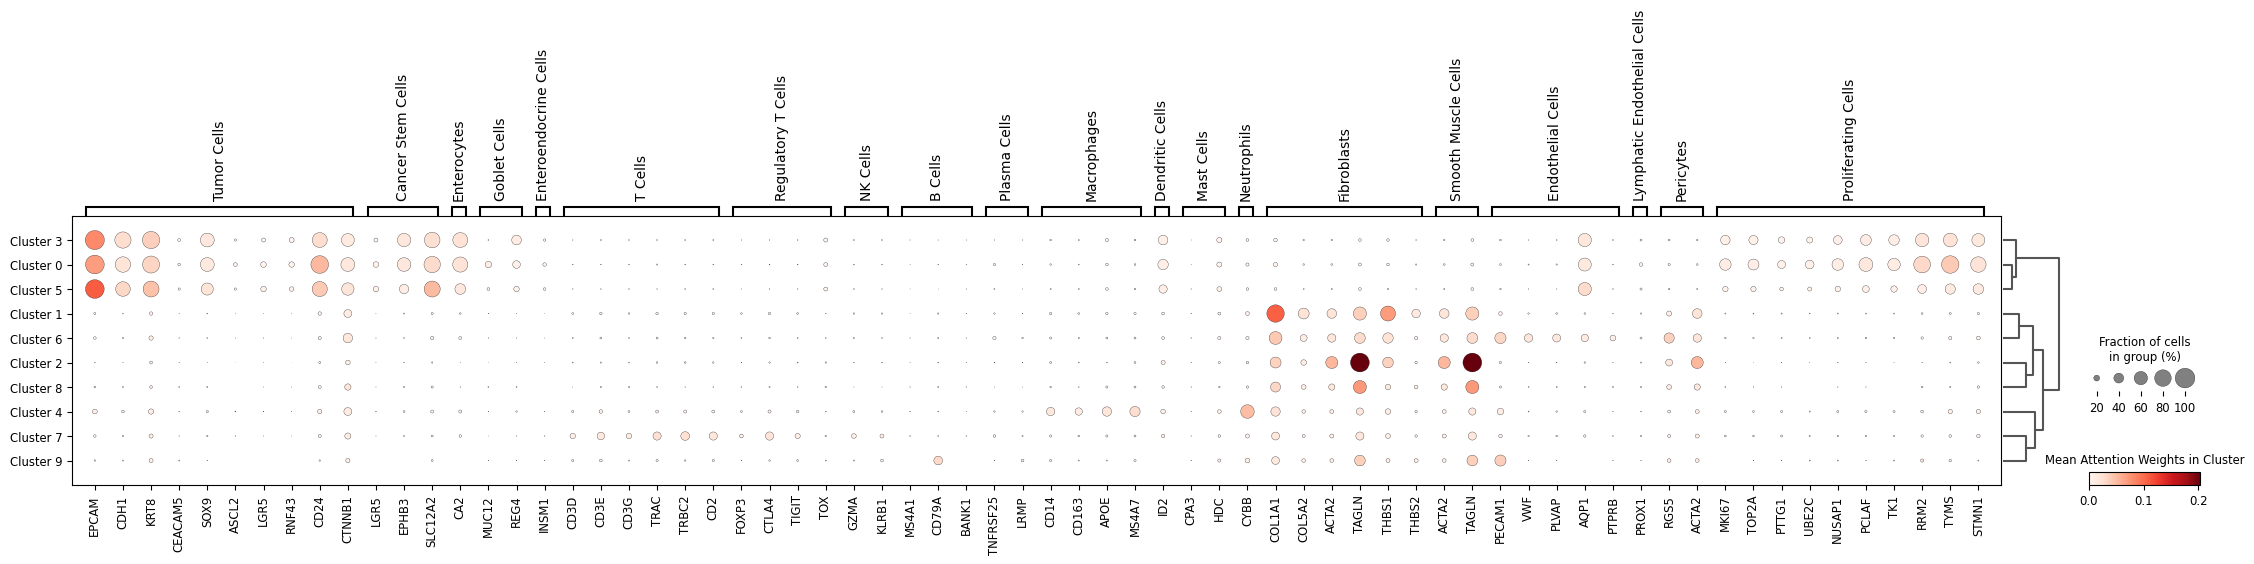

In [9]:
attention_matrices = attention_results['adj_matrix']

kwargs = {'attention_matrices': attention_matrices, 'cell_ids': cell_ids, 'gene_names': gene_names, 'layer_idx': 4, 'max_cells': None, 'min_attention_threshold': 1e-6, 'max_attention_threshold': 1, 'method': 'layer_norm', 'threshold': 0.001, 'clustering_method': 'leiden', 'resolution': 0.8, 'random_state': 42, 'top_k': 5, 'marker_genes_dict': marker_genes_dict, 'save_path_attention_distribution': None, 'save_path_umap': None, 'save_path_top_genes_cluster_heatmap': None, 'save_path_top_genes_cell_heatmap': None}

analyzer = GeneCellAttentionAnalyzer(num_genes=attention_matrices[0][0].shape[0], num_cells=attention_matrices[0][0].shape[1], num_heads=4, num_layers=5)

analyzer.run_complete_analysis(**kwargs)